In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
data= pd.read_csv("D:/iAnalyst/Machine Learning/Task from scratch/FuelEcon.csv")
df= data.copy()
df.head(10)

,Truck,Name,Drive,Displacement,Cylinders,Transmission,CityMPG
0,1,C1500 SILVERADO,2WD,4.3,6,Auto,15
1,2,C1500 SILVERADO,2WD,4.3,6,Manual,15
2,3,C1500 SILVERADO,2WD,4.8,8,Auto,15
3,4,C1500 SILVERADO,2WD,4.8,8,Manual,16
4,5,C1500 SILVERADO,2WD,5.3,8,Auto,11
5,6,C1500 SILVERADO,2WD,5.3,8,Auto,15
6,7,C1500 SILVERADO,2WD,5.3,8,Auto,15
7,8,SSR PICKUP,2WD,5.3,8,Auto,15
8,9,CHEVY C2500 SILVERADO,2WD,6.0,8,Auto,10
9,10,CHEVY C2500 SILVERADO,2WD,6.0,8,Auto,10


In [54]:
df.Transmission.unique()  #auto, manual
df.Drive.unique()  #2WD, 4WD

print(df.Name.unique())

['C1500 SILVERADO' 'SSR PICKUP' 'CHEVY C2500 SILVERADO' 'C1500 SIERRA'
 'K1500 SILVERADO' 'S10 PICKUP' 'K1500 SIERRA' 'SONOMA']


In [55]:
df.describe()

,Truck,Displacement,Cylinders,CityMPG
count,35.000000,35.000000,35.000000,35.000000
mean,18.000000,4.882857,7.314286,13.857143
std,10.246951,0.511334,0.963188,1.784622
min,1.000000,4.300000,6.000000,10.000000
25%,9.500000,4.300000,6.000000,14.000000
50%,18.000000,4.800000,8.000000,14.000000
75%,26.500000,5.300000,8.000000,15.000000
max,35.000000,6.000000,8.000000,16.000000


In [56]:
df.isnull().sum()  #no missing values

Truck           0
Name            0
Drive           0
Displacement    0
Cylinders       0
Transmission    0
CityMPG         0
dtype: int64

In [57]:
df.drop('Truck', axis=1,inplace=True )

# EDA

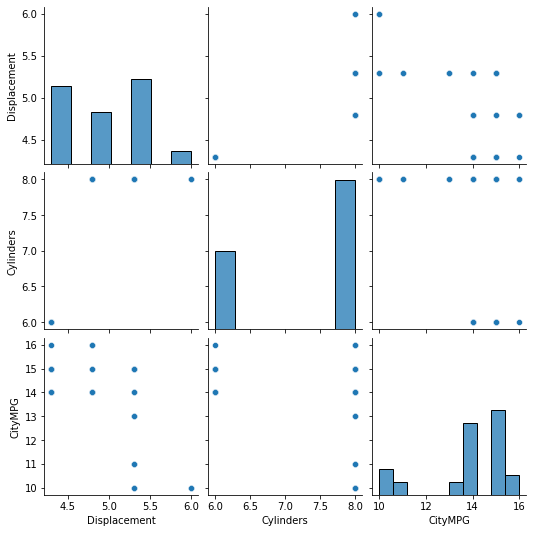

In [58]:
sns.pairplot(data = df)

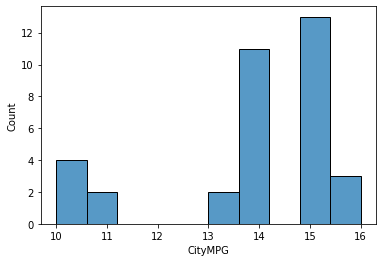

In [59]:
sns.histplot(df['CityMPG'])
plt.show()

<AxesSubplot:>

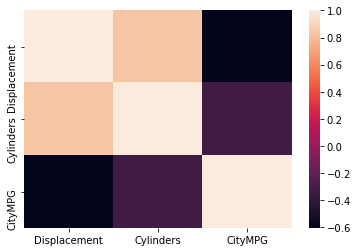

In [60]:
sns.heatmap(df.corr())

#This shows mileage is heavily (negatively)dependent on displacement i.e. more the displacement, less the mileage
#Also Cylinders are positively dependent on displacement: i.e. more the cylinders, more the displacement (vice versa)

## Labelling the categorical variables

In [61]:
from sklearn.preprocessing import LabelEncoder

labEn= LabelEncoder()
df['Drive'] = labEn.fit_transform(df['Drive'])  
df['Transmission'] = labEn.fit_transform(df['Transmission'])
df['Name'] = labEn.fit_transform(df['Name'])

In [62]:
df.head(10)

,Name,Drive,Displacement,Cylinders,Transmission,CityMPG
0,1,0,4.3,6,0,15
1,1,0,4.3,6,1,15
2,1,0,4.8,8,0,15
3,1,0,4.8,8,1,16
4,1,0,5.3,8,0,11
5,1,0,5.3,8,0,15
6,1,0,5.3,8,0,15
7,7,0,5.3,8,0,15
8,2,0,6.0,8,0,10
9,2,0,6.0,8,0,10


# Modelling

### Multiple Linear Regression

In [63]:
X = df.drop('CityMPG', axis=1)
y = df['CityMPG']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [64]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train,y_train)

LinearRegression()

In [65]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Name,-0.087655
Drive,-0.658481
Displacement,-4.087758
Cylinders,1.058175
Transmission,-0.197195


In [66]:
predictions = lm.predict(X_test)

In [70]:
from sklearn import metrics
print('R^2:',lm.score(X_train,y_train))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

R^2: 0.5912076371978485
MAE: 0.8699837166595934
MSE: 1.6561564380129212
RMSE: 1.2869174169358815


### KNN

In [87]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5,p=2) #when p=2 (default), it is Euclidean  distance. The general form is the Minkowski distance
print(knn)

knn.fit(X_train,y_train)

pred = knn.predict(X_test)

pred

KNeighborsRegressor()


array([14.4, 13.4, 13. , 14.4, 12.8, 14.2, 14.4])

In [89]:
from sklearn.metrics import mean_squared_error 
from math import sqrt

print("RMSE with k=5 is ",sqrt(mean_squared_error(y_test,pred)))

RMSE with k=5 is  1.3373748272535373


In [93]:
rmse_val = [] #to store rmse values for different k
for K in range(28):
    K = K+1
    knn = KNeighborsRegressor(n_neighbors=K,p=2)

    knn.fit(X_train, y_train)  #fit the model
    pred=knn.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1.647508942095828
RMSE value for k=  2 is: 1.5236235005501102
RMSE value for k=  3 is: 1.708986518564415
RMSE value for k=  4 is: 1.6118977280566797
RMSE value for k=  5 is: 1.3373748272535373
RMSE value for k=  6 is: 1.339272486707165
RMSE value for k=  7 is: 1.391351881555862
RMSE value for k=  8 is: 1.424435978604464
RMSE value for k=  9 is: 1.3093073414159544
RMSE value for k=  10 is: 1.1946308455514019
RMSE value for k=  11 is: 1.256858398642619
RMSE value for k=  12 is: 1.273197449742869
RMSE value for k=  13 is: 1.3994927229738656
RMSE value for k=  14 is: 1.5324478788714893
RMSE value for k=  15 is: 1.562659515667044
RMSE value for k=  16 is: 1.536933693615775
RMSE value for k=  17 is: 1.5670860774373168
RMSE value for k=  18 is: 1.5490225626087244
RMSE value for k=  19 is: 1.5447422858583997
RMSE value for k=  20 is: 1.5230373787740261
RMSE value for k=  21 is: 1.5189121983439136
RMSE value for k=  22 is: 1.5111744340121054
RMSE value for k=  23 is: 1.

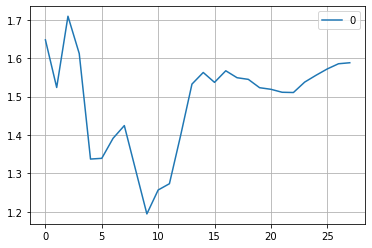

In [94]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()
plt.grid()

In [98]:
K=9
knn = KNeighborsRegressor(n_neighbors=K,p=2)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K={} RMSE is '.format(K))
print(sqrt(mean_squared_error(y_test,pred)))

WITH K=9 RMSE is 
1.3093073414159544


In [96]:
pred

array([13.66666667, 13.55555556, 13.33333333, 13.66666667, 12.88888889,
       14.11111111, 13.66666667])

# Decision Tree

In [111]:
from sklearn.tree import DecisionTreeRegressor

In [170]:
dt = DecisionTreeRegressor(min_samples_split=12, max_depth=3)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [171]:
y_pred

array([14.28571429, 13.27272727, 14.28571429, 14.28571429, 13.27272727,
       14.28571429, 14.28571429])

In [172]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
RMSE

1.4407810168650401

### Random Forest 

In [174]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [253]:
rf = RandomForestRegressor(max_features=2,n_estimators=10,max_depth=2,min_samples_split=10 ,random_state= 101) #max_features=4,n_estimators=100,max_depth=10,min_samples_split=20
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [254]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
RMSE

1.4660731927184776

In [256]:
R2 = rf.score(X_train,y_train)

0.4721200022240024

### Adaboost

In [251]:
ada = AdaBoostRegressor(random_state= 101) #max_features=4,n_estimators=100,max_depth=10,min_samples_split=20
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

In [252]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
RMSE

1.450846741810304

In [255]:
R2 = ada.score(X_train,y_train)

0.46576267371856184

### Gradient Boosting

In [265]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=101)#,max_depth=6)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

In [266]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
RMSE

1.647508942095828

In [267]:
R2 = gb.score(X_train,y_train)
R2

0.8214285714285714

### Artificial Neural Network